<a href="https://colab.research.google.com/github/Samuel-Njoroge/Car_Prices_Prediction/blob/main/Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION.**

# ***1. Data Preparation.***

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Loading data
car_data = pd.read_csv("https://raw.githubusercontent.com/Samuel-Njoroge/Machine_Learning_Bookcamp/master/chapter-02-car-price/data.csv")


In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Viewing the columns
car_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
#Making all column names lower and removing the white spaces
car_data.columns = car_data.columns.str.lower().str.replace(' ', '_')

In [6]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
#Converting the column names whose type is an object into a list
strings = list(car_data.dtypes[car_data.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
  car_data[col] = car_data[col].str.lower().str.replace(' ', '_')

In [9]:
car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# ***2. Exploratory Data Analysis.***

In [10]:
for col in car_data.columns:
  print(col)
  print(car_data[col].unique()[:5])
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
['1_series_m' '1_series' '100' '124_spider' '190-class']

year
[2011 2012 2013 1992 1993]

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
[335. 300. 230. 320. 172.]

engine_cylinders
[ 6.  4.  5.  8. 12.]

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
[ 2.  4.  3. nan]

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']

vehicle_size
['compact' 'midsize' 'large']

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

highway_mpg
[26 28 27 25 24]

city_mpg
[19 20 18 17 16]

popularity
[3916 3105  819  617 1013]

msrp
[46135 40650 36350 29450 34500]



Text(0, 0.5, 'Frequency')

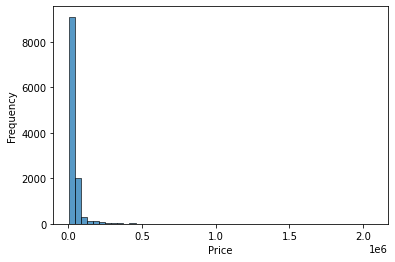

In [11]:
sns.histplot(car_data.msrp, bins = 50)
plt.xlabel("Price")
plt.ylabel("Frequency")

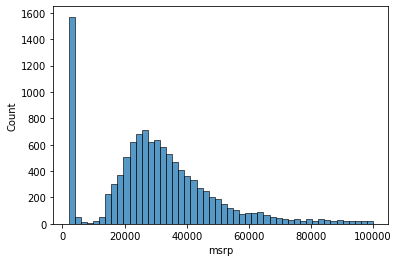

In [12]:
sns.histplot(car_data.msrp[car_data.msrp < 100000], bins = 50)

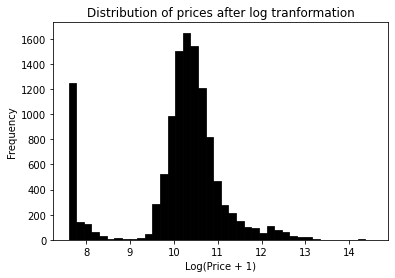

In [13]:
log_price = np.log1p(car_data.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [14]:
#Missing values
car_data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# ***3. Setting up Validation Framework.***

In [15]:
#Size of dataframe
n = len(car_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [16]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [17]:
car_data_train = car_data.iloc[:n_train]
car_data_val = car_data.iloc[n_train : n_train +  n_val]
car_data_test = car_data.iloc[n_train + n_val:]


In [18]:
idx = np.arange(2)
np.random.shuffle(idx)

In [19]:
car_data_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [20]:
len(car_data_train), len(car_data_val), len(car_data_test)

(7150, 2382, 2382)

In [21]:
car_data_train = car_data_train.reset_index(drop = True)
car_data_val = car_data_val.reset_index(drop = True)
car_data_test = car_data_test.reset_index(drop = True)

In [22]:
y_train = np.log1p(car_data_train.msrp.values)
y_val = np.log1p(car_data_val.msrp.values)
y_test = np.log1p(car_data_test.msrp.values)

In [23]:
del car_data_train['msrp']
del car_data_val['msrp']
del car_data_test['msrp']


In [24]:
len(y_train)

7150

# ***3. Linear Regression.***
A modell used when predicting an output in numbers.

g(x) = y
g = model (Linear Regression)
x = feature matrix
y = predicted varable (price)

In [25]:
car_data_train.iloc[10]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category          luxury,high-performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   28
city_mpg                                      20
popularity                                  3916
Name: 10, dtype: object

In [26]:
xi = [453, 11, 86]

In [27]:
w0 = 0
w = [1, 1, 1]

In [28]:
def linear_regression(xi):
  n = len(xi)
  pred = w0
  for j in range(n):
    pred = pred + w[j] * xi[j]
    return pred

In [29]:
linear_regression(xi)

453

In [30]:
np.exp(12.312) -1

222347.2221101062

***Linear Regression in Vector Form***

In [31]:
def dot(xi, w):
  n = len(xi)

  res = 0.0

  for j in range(n):
    res = res + xi[j] * w[j]
  return res


In [32]:
def linear_regression(xi):
  return w0 + dot(xi, w)

In [33]:
w_new = [w0] + w

In [34]:
w_new

[0, 1, 1, 1]

In [35]:
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

In [36]:
linear_regression(xi)

550.0

In [37]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [38]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X


array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [39]:
def linear_regression(X):
  return X.dot(w_new)

In [40]:
linear_regression(X)

array([1557, 2188,  550])

# ***3.1 Training a Linear Regression Model.***

In [41]:
def train_linear_regression(X, y):
  pass

In [42]:
X = [
    [148, 24, 1385],
     [132, 25, 2031],
     [453, 11, 86],
     [158, 24, 185],
     [172, 25, 201],
     [413, 11, 86],
     [38, 54, 185],
     [142, 25, 431],
     [453, 31, 86]
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [43]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
X = np.column_stack([ones, X])

In [45]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [46]:
#Gram Matrix
XTX = X.T.dot(X)

In [47]:
XTX_inv = np.linalg.inv(XTX)

In [48]:
w_full = XTX_inv.dot(X.T).dot(y)

In [49]:
w0 = w_full[0]
w = w_full[1:]

In [50]:
w0, w

(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

In [51]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [52]:
train_linear_regression(X,y)

(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

# ***3.2 Car Price Baseline Model.***

In [53]:
car_data_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [54]:
car_data_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [55]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
car_data_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916
...,...,...,...,...,...
7145,160.0,6.0,18,14,586
7146,160.0,6.0,18,14,586
7147,365.0,6.0,20,15,61
7148,365.0,6.0,19,15,61


In [56]:
X_train = car_data_train[base].values

In [57]:
car_data_train[base].fillna(0).values

array([[ 335.,    6.,   26.,   19., 3916.],
       [ 300.,    6.,   28.,   19., 3916.],
       [ 300.,    6.,   28.,   20., 3916.],
       ...,
       [ 365.,    6.,   20.,   15.,   61.],
       [ 365.,    6.,   19.,   15.,   61.],
       [ 365.,    6.,   22.,   16.,   61.]])

In [58]:
w0, w = train_linear_regression(X_train, y_train)

In [59]:
y_pred = w0 + X_train.dot(w)

ValueError: ignored

In [ ]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

# ***3.3 RMSE***

In [ ]:
def rmse(y, y_pred):
  se = ( y - y_pred) **2
  mse = se.mean()
  return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

# ***3.4 Validating the Model.***

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = car_data_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [ ]:
def prepare_X(df):
  car_data_train_num = car_data_train[base]
  car_data_train_num = car_data.fillna(0)
  X = car_data_train.values
  return X


In [ ]:
X_train = prepare_X(car_data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_data_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)


# ***Simple feature Engineering.***

In [61]:
2017 - car_data_train.year

0        6
1        6
2        6
3        6
4        6
        ..
7145    23
7146    23
7147     2
7148     2
7149     2
Name: year, Length: 7150, dtype: int64

In [ ]:
def prepare_X(car_data_train):
  car_data_train = car_data_train.copy()
  car_data_train['age'] = 2017 - car_data_train.year
  features = base + ['age']
  car_data_train_num = car_data_train[base]
  car_data_train_num = car_data_train.fillna(0)
  X = car_data_train_num.values
  return X

In [ ]:
X_train = prepare_X(car_data_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(car_data_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

In [63]:
X_train = 

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

# ***Categorical Variables***

In [70]:
for v in [2, 3, 4]:
  car_data_train['number_of_doors_%s % v'] = (car_data_train.number_of_doors == v).astype('int')


In [ ]:
def prepare_X(car_data_train):
  car_data_train = car_data_train.copy()

  car_data_train['age'] = 2017 - car_data_train.year
  features = base + ['age']

  for v in [2, 3, 4]:
    car_data_train['number_of_doors_%s % v'] = (car_data_train.number_of_doors == v).astype('int')


  car_data_train_num = car_data_train[base]
  car_data_train_num = car_data_train.fillna(0)
  X = car_data_train_num.values
  return X

In [68]:
'num_doors_%s' % 4

'num_doors_4'

# **Regilarization.**